# Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score

# Load Data

In [22]:
file_path = pd.read_csv("Salary_Data.csv")
file_path.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [23]:
print("Shape:", file_path.shape)

Shape: (6704, 6)


In [24]:
file_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [25]:
file_path.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [26]:
file_path.isnull().sum()

,0
Age,2
Gender,2
Education Level,3
Job Title,2
Years of Experience,3
Salary,5


# **EDA**

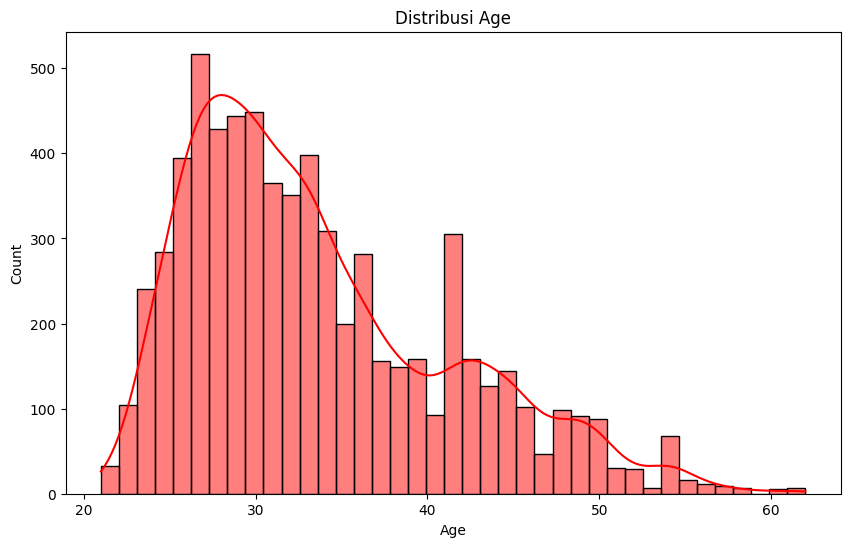

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(file_path["Age"], kde=True, color='red')
plt.title("Distribusi Age")
plt.show()

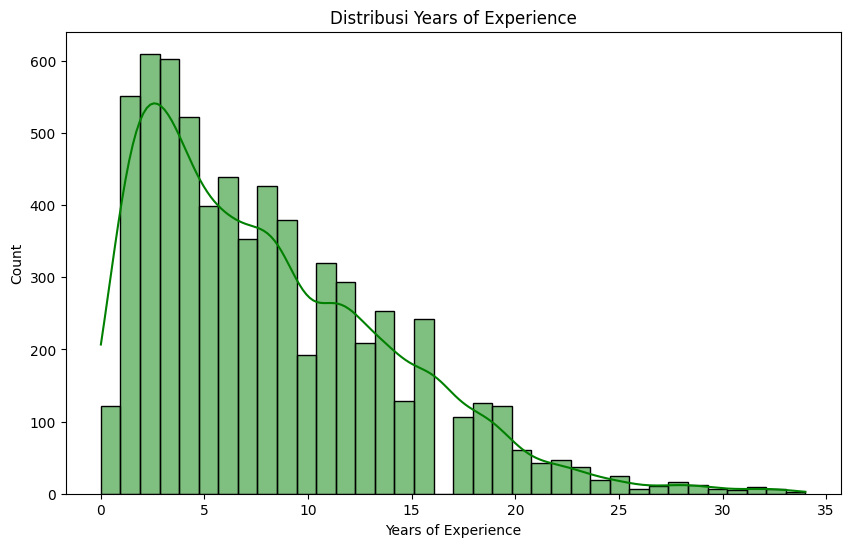

In [28]:
plt.figure(figsize=(10,6))
sns.histplot(file_path["Years of Experience"], kde=True, color='green')
plt.title("Distribusi Years of Experience")
plt.show()

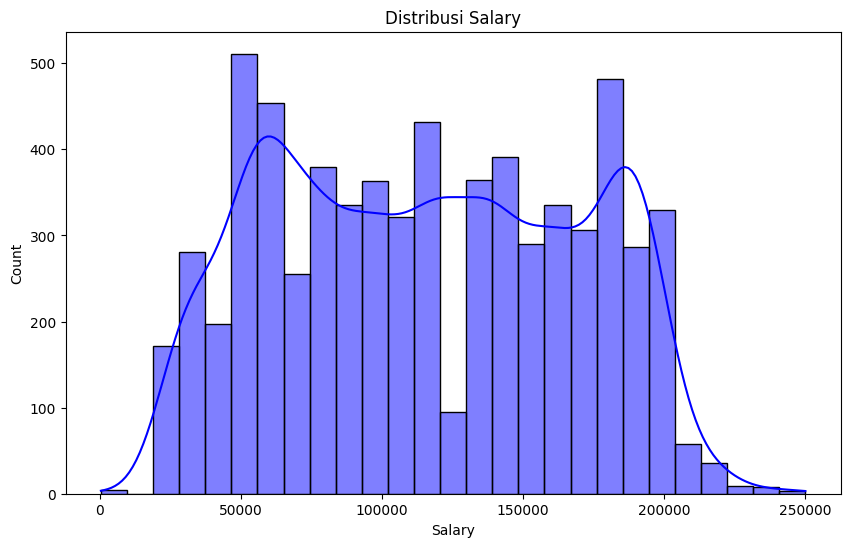

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(file_path["Salary"], kde=True, color='blue')
plt.title("Distribusi Salary")
plt.show()

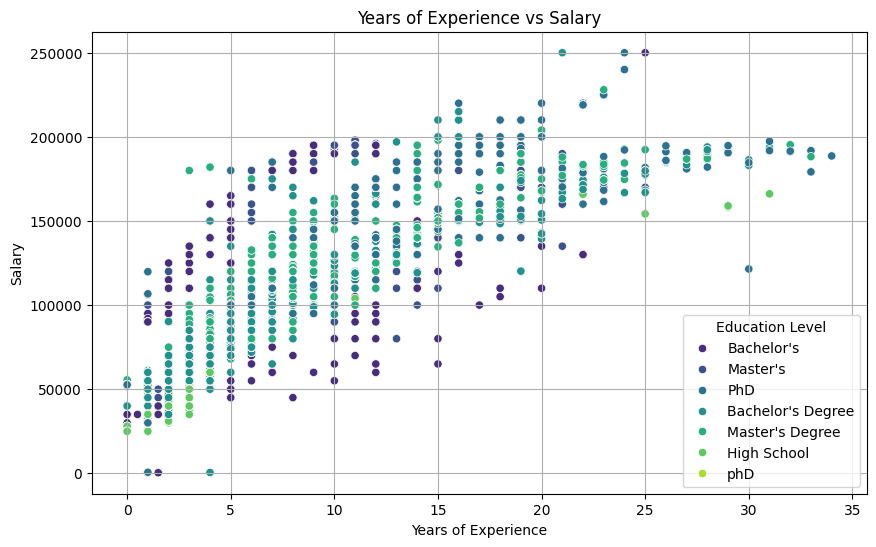

In [30]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Years of Experience",
    y="Salary",
    hue="Education Level",
    data=file_path,
    palette='viridis'
)
plt.title("Years of Experience vs Salary")
plt.grid(True)
plt.show()

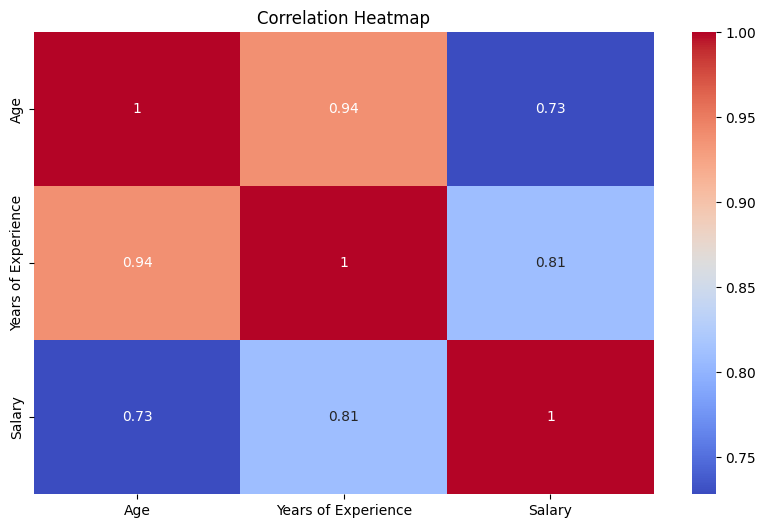

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(file_path.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Cleaning

In [32]:
# Imputasi numerik (median)
for col in ['Age', 'Years of Experience', 'Salary']:
    file_path[col] = file_path[col].fillna(file_path[col].median())

# Imputasi kategorikal (mode)
for col in ['Gender', 'Education Level', 'Job Title']:
    file_path[col] = file_path[col].fillna(file_path[col].mode()[0])

file_path['Education Level'] = file_path['Education Level'].replace("phD", "PhD")

print("Missing values after cleaning:")
print(file_path.isnull().sum())


Missing values after cleaning:
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


# Persiapan sebelum Preprocesing

In [33]:
# DEFINISI FITUR & TARGET
X = file_path[['Age', 'Years of Experience', 'Gender', 'Education Level', 'Job Title']]
y = file_path['Salary']

# SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocessing

In [34]:
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Model

In [35]:
linear_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

linear_pipeline.fit(X_train, y_train)
y_pred_linear = linear_pipeline.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("\n===== LINEAR REGRESSION =====")
print("MSE :", mse_linear)
print("R²  :", r2_linear)


===== LINEAR REGRESSION =====
MSE : 322767151.8841827
R²  : 0.8791445117797255


In [36]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,
        random_state=42
    ))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n===== RANDOM FOREST =====")
print("MSE :", mse_rf)
print("R²  :", r2_rf)


===== RANDOM FOREST =====
MSE : 50639515.93912936
R²  : 0.9810387662240863


In [37]:
xgb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=200,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

xgb_pipeline.fit(X_train, y_train)
y_pred_xgb = xgb_pipeline.predict(X_test)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n===== XGBOOST REGRESSOR =====")
print("MSE :", mse_xgb)
print("R²  :", r2_xgb)



===== XGBOOST REGRESSOR =====
MSE : 95771689.09768231
R²  : 0.9641396772378684


# Tabel Pebandingan Model

In [38]:
models = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "MSE": [mse_linear, mse_rf, mse_xgb],
    "R²": [r2_linear, r2_rf, r2_xgb]
})

print("\n==============================")
print("PERBANDINGAN MODEL")
print("==============================")
print(models)


PERBANDINGAN MODEL
               Model           MSE        R²
0  Linear Regression  3.227672e+08  0.879145
1      Random Forest  5.063952e+07  0.981039
2            XGBoost  9.577169e+07  0.964140
